## Red Wine Quality Prediction Project

### Problem Statement

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

In [5]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data                   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploratory Data Analysis(EDA)

In [7]:
data.shape

(1599, 12)

In [8]:
#Checking for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see there are no missing values present for now. Let's move ahead.

In [9]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

We can see the unique values in each of the columns.

In [10]:
#Checking the value count for each column
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

We can see the data count of each column.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives the information about the column count, row count, non-null values, column names, data type and memory usage.

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It gives the statistical information about the data such as count of the values, mean, standard deviation, min, 25% quantile, 50% quantile, 75% quantile and max values. It deals with numerical data only.

### Checking for Correlation 

In [13]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


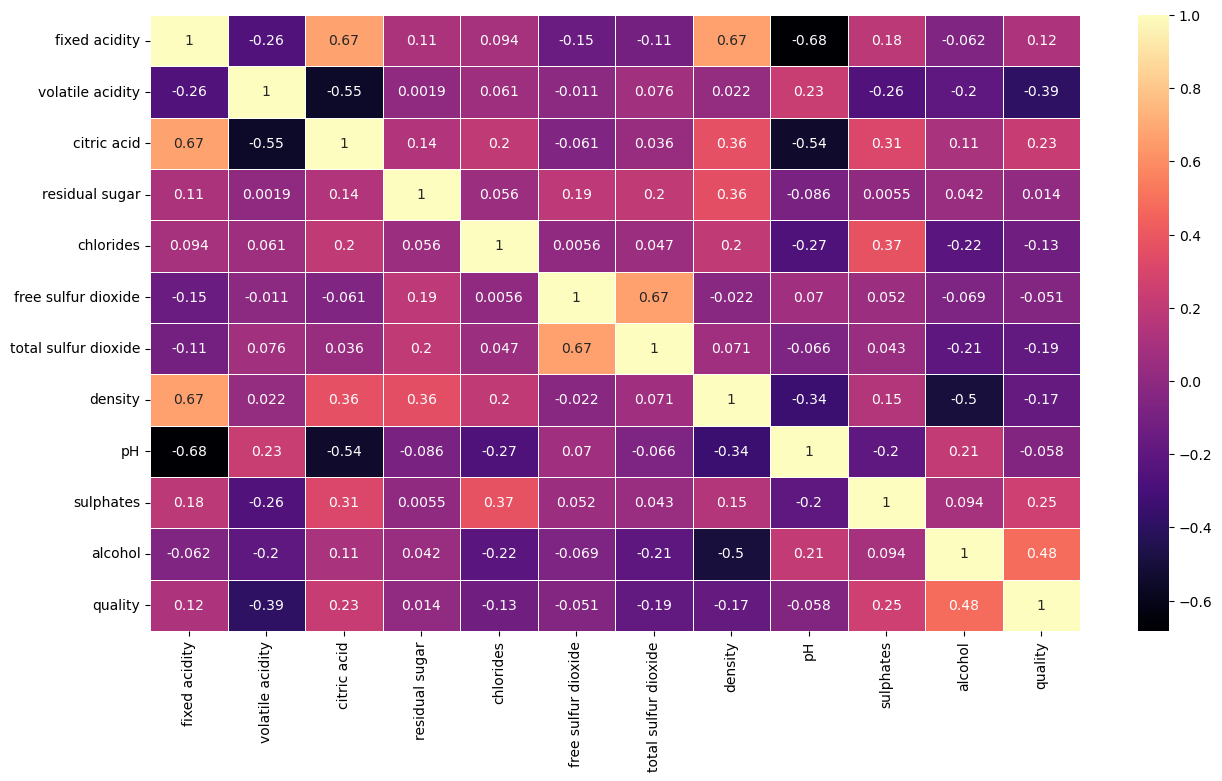

In [14]:
#Let's plot a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, linewidth=0.5, cmap='magma')
plt.show()

From the above heatmap we can see that alcohol has 48% positive correlation with quality, then there comes sulpahtes with 25% positive correlation, then citric acid with 23% positive correlation with quality.

### Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


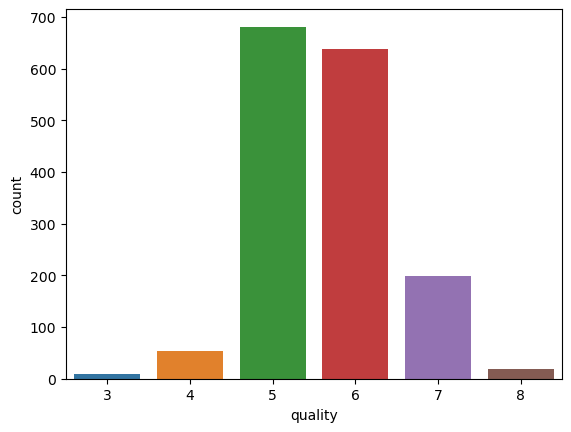

In [15]:
#Visualizing the quality
ax = sns.countplot(x='quality', data=data)
print(data['quality'].value_counts())
plt.show()

Here, we can see that most of the quality of wine is in the range of 5-7.

Let's do some comparision:

<Axes: xlabel='quality', ylabel='fixed acidity'>

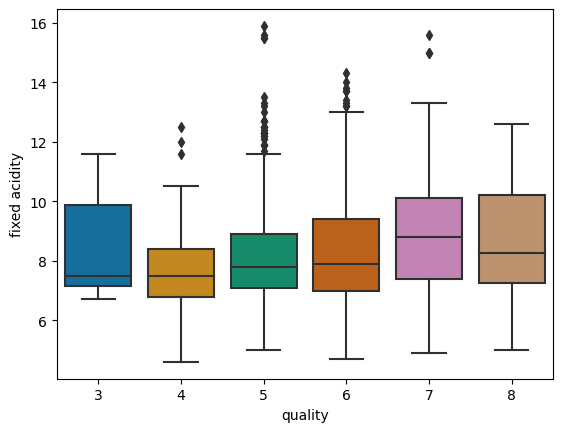

In [16]:
sns.boxplot(x='quality', y='fixed acidity', data=data, palette='colorblind')   

We don't see any dependency of fixed acidity over wine quality.

<Axes: xlabel='quality', ylabel='volatile acidity'>

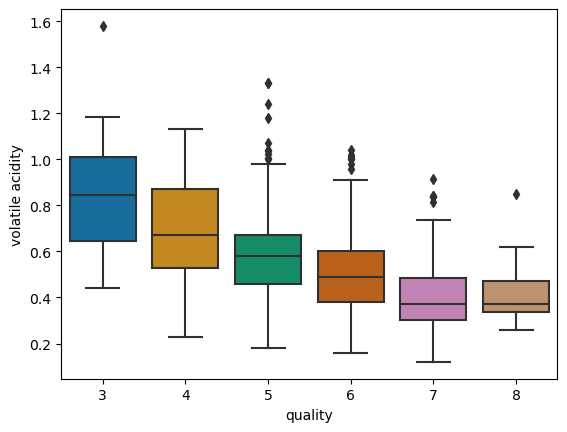

In [17]:
sns.boxplot(x='quality', y='volatile acidity', data=data, palette='colorblind')   

We can see that there is an increase in the quality of the wine with the decrease in volatile acidity.

<Axes: xlabel='quality', ylabel='citric acid'>

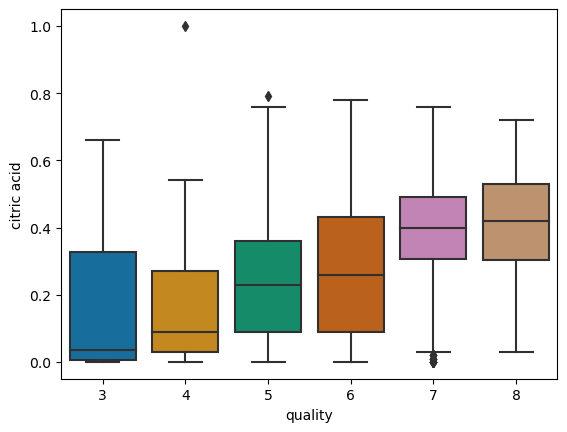

In [18]:
sns.boxplot(x='quality', y='citric acid', data=data, palette='colorblind')   

There is an increase in the wine quality with the increase in citric acid.

<Axes: xlabel='quality', ylabel='residual sugar'>

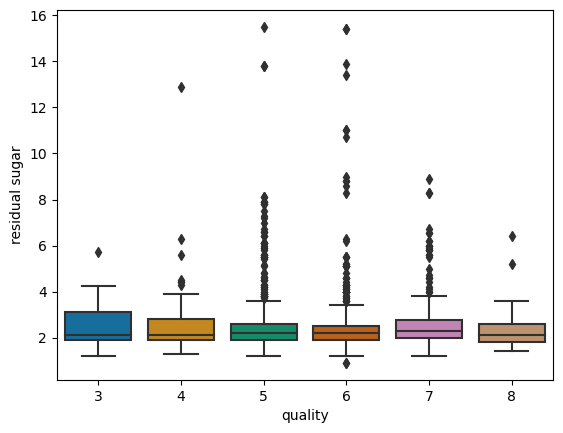

In [19]:
sns.boxplot(x='quality', y='residual sugar', data=data, palette='colorblind')   

There is no much effect on the quality with residual sugar.

<Axes: xlabel='quality', ylabel='chlorides'>

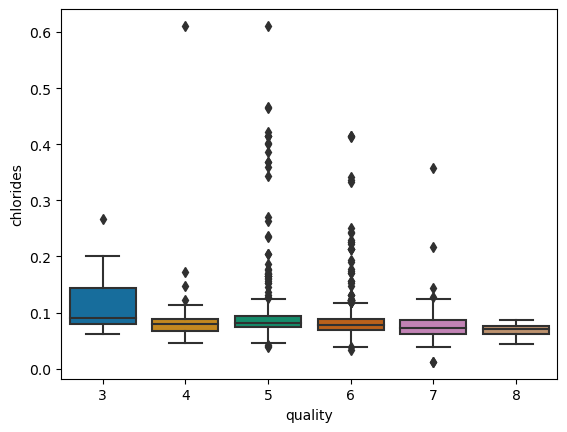

In [20]:
sns.boxplot(x='quality', y='chlorides', data=data, palette='colorblind')   

There isn't a slight change in the quality of wine with respect to chlorides.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

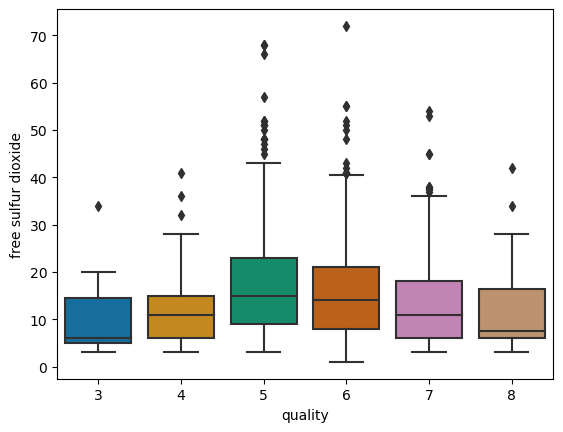

In [21]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=data, palette='colorblind')   

There is not much difference.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

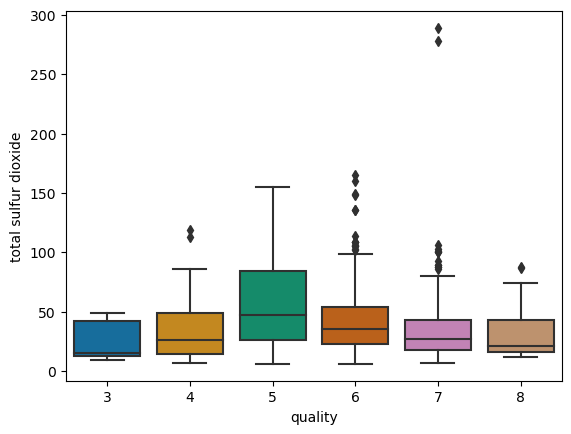

In [22]:
sns.boxplot(x='quality', y='total sulfur dioxide', data=data, palette='colorblind')   

No much difference.

<Axes: xlabel='quality', ylabel='density'>

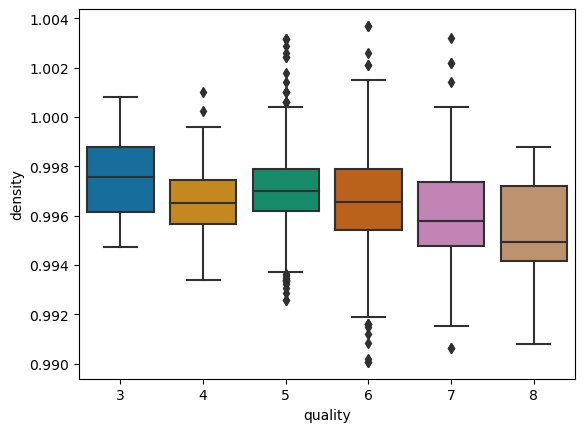

In [23]:
sns.boxplot(x='quality', y='density', data=data, palette='colorblind')   

Here, we can see that the quality increases with decrease in density.

<Axes: xlabel='quality', ylabel='pH'>

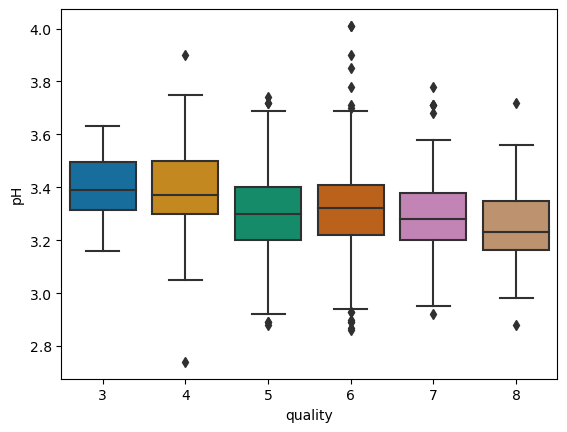

In [24]:
sns.boxplot(x='quality', y='pH', data=data, palette='colorblind')   

We can see that the quality increases with the decrease in pH.

<Axes: xlabel='quality', ylabel='sulphates'>

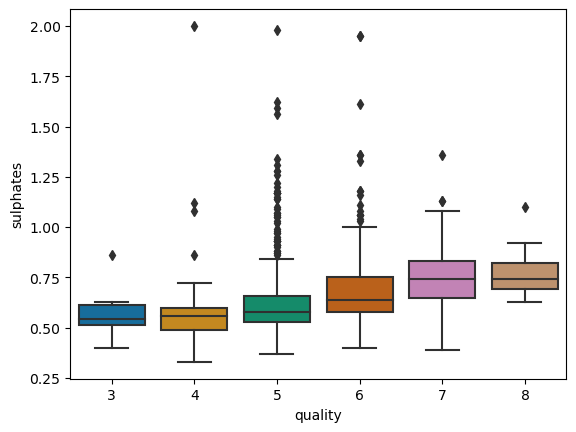

In [25]:
sns.boxplot(x='quality', y='sulphates', data=data, palette='colorblind')   

Here, we can see that the quality increases with the increase in the amount of sulphates.

<Axes: xlabel='quality', ylabel='alcohol'>

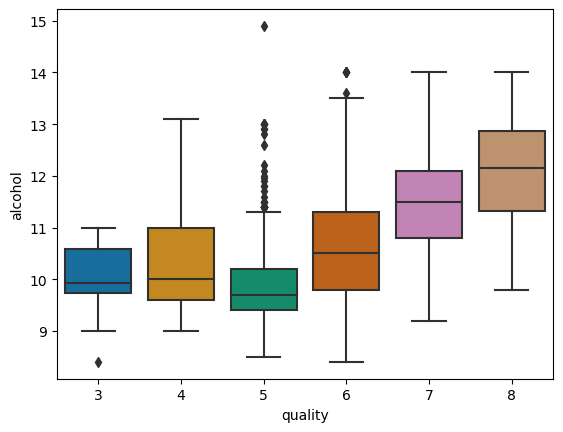

In [26]:
sns.boxplot(x='quality', y='alcohol', data=data, palette='colorblind')   

Here, the quality of wine increases with the increase in the amount of alcohol. Moreover, more the alcohol content better is the quality of wine.

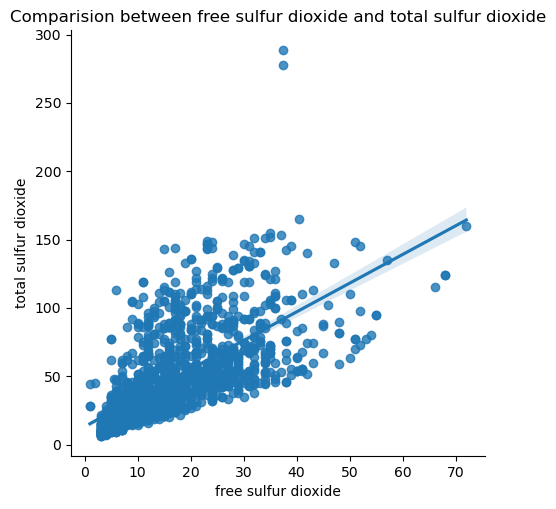

In [27]:
#Comparing total sulfur dioxide and free sulfur dioxide
sns.lmplot(x='free sulfur dioxide', y='total sulfur dioxide', data=data, palette='colorblind')
plt.title("Comparision between free sulfur dioxide and total sulfur dioxide")
plt.show()

We can see a positive correlation between them. Great! Let's go ahead.

### Model Training

Since our label contains continuous data, it will create some problem if we don't change it. Let's use Label Encoder to solve the issue.

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [30]:
lab = LabelEncoder()

data['quality'] = lab.fit_transform(data['quality'])

In [31]:
#Let's check
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


We have successfully encoded our label data. Let's move ahead.

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#Dividing into train and test
x = data.drop(columns = ['quality'], axis=1)
y = data['quality']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=41)

### Scaling the data using Standard Scaler

In [35]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = scaler.transform(x_test)

In [36]:
x_train

,0,1,2,3,4,5,6,7,8,9,10
0,0.184034,1.108803,-0.160487,2.888299,0.636383,1.431469,2.652501,2.488148,0.060053,2.411511,-1.031708
1,-0.226000,-0.716176,0.149292,-0.520130,1.490020,-1.325537,-0.053713,0.290103,-0.004351,1.480958,-0.844175
2,2.175629,0.575348,1.181889,-0.804166,-0.345299,-0.945261,-0.631444,0.630721,-1.550053,-0.321988,-0.000274
3,-0.343153,-1.390014,0.149292,-0.378112,-0.537368,0.195570,-0.388189,-0.811580,-0.197564,1.422799,0.843627
4,0.476916,0.406888,-1.399604,-0.449121,-0.622731,-1.040330,-1.117954,0.518956,-0.841606,-0.147509,-0.000274
...,...,...,...,...,...,...,...,...,...,...,...
1194,2.175629,-0.772329,2.007966,0.331977,0.124201,-0.374845,-0.509816,1.530163,-0.841606,-0.147509,0.374793
1195,3.932919,-1.783086,0.872110,-0.236094,-0.259936,-0.564984,-0.692258,1.769659,-1.550053,1.073841,-1.125475
1196,0.594068,0.463041,-0.057228,0.616013,0.060178,0.861054,1.223377,1.609995,-0.455181,-0.205668,-0.656641
1197,-0.167424,-0.266950,0.355811,-0.236094,-0.302618,0.005431,-0.661851,-1.663123,-0.197564,0.026970,1.875062


We have scaled the data to reduce biasness.

### VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x_train.values, i)
                    for i in range(len(x_train.columns))]
vif["Features"] = x_train.columns
vif


,VIF Values,Features
0,7.647675,0
1,1.818860,1
2,3.130288,2
3,1.680074,3
4,1.491320,4
5,1.886308,5
6,2.105832,6
7,6.325043,7
8,3.360364,8
9,1.432172,9


We can see all our VIF values are less than 10, that means they are acceptable. Let's move ahead.

### Data Modelling

In [42]:
#Importing necessary libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [39]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.88
[[331   8]
 [ 40  21]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       339
           1       0.72      0.34      0.47        61

    accuracy                           0.88       400
   macro avg       0.81      0.66      0.70       400
weighted avg       0.87      0.88      0.86       400



### Random Forest Classifier

In [40]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.92
[[333   6]
 [ 26  35]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       339
           1       0.85      0.57      0.69        61

    accuracy                           0.92       400
   macro avg       0.89      0.78      0.82       400
weighted avg       0.92      0.92      0.91       400



### Gradient Boositng Classifier

In [44]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9025
[[329  10]
 [ 29  32]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       339
           1       0.76      0.52      0.62        61

    accuracy                           0.90       400
   macro avg       0.84      0.75      0.78       400
weighted avg       0.90      0.90      0.89       400



### Ada Boost Classifier

In [45]:
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB = AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8925
[[327  12]
 [ 31  30]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       339
           1       0.71      0.49      0.58        61

    accuracy                           0.89       400
   macro avg       0.81      0.73      0.76       400
weighted avg       0.88      0.89      0.88       400



### Bagging Classifier

In [46]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.915
[[333   6]
 [ 28  33]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       339
           1       0.85      0.54      0.66        61

    accuracy                           0.92       400
   macro avg       0.88      0.76      0.81       400
weighted avg       0.91      0.92      0.91       400



### Extra Trees Classifier

In [47]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9075
[[333   6]
 [ 31  30]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       339
           1       0.83      0.49      0.62        61

    accuracy                           0.91       400
   macro avg       0.87      0.74      0.78       400
weighted avg       0.90      0.91      0.90       400



### SVC

In [48]:
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)
print(accuracy_score(y_test, predSV))
print(confusion_matrix(y_test, predSV))
print(classification_report(y_test, predSV))

0.8925
[[337   2]
 [ 41  20]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       339
           1       0.91      0.33      0.48        61

    accuracy                           0.89       400
   macro avg       0.90      0.66      0.71       400
weighted avg       0.89      0.89      0.87       400



### KNeighbors Classifier

In [49]:
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
predKN = KN.predict(x_test)
print(accuracy_score(y_test, predKN))
print(confusion_matrix(y_test, predKN))
print(classification_report(y_test, predKN))

0.8925
[[328  11]
 [ 32  29]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       339
           1       0.72      0.48      0.57        61

    accuracy                           0.89       400
   macro avg       0.82      0.72      0.76       400
weighted avg       0.88      0.89      0.88       400



### Decision Tree Classifier

In [50]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.86
[[306  33]
 [ 23  38]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       339
           1       0.54      0.62      0.58        61

    accuracy                           0.86       400
   macro avg       0.73      0.76      0.75       400
weighted avg       0.87      0.86      0.86       400



We can see from all classifiers Random Forest Classifier gives the best accuracy score of 92%.

### Cross Validation Score

In [51]:
#Checking cv score Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.875      0.8625     0.88125    0.85       0.87147335]
0.868044670846395
Difference between Accuracy score and cross validation score is -  0.011955329153604977


In [52]:
#Checking cv score Random Forest Classifier
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRF) - score.mean())

[0.878125   0.8375     0.903125   0.853125   0.88401254]
0.8711775078369908
Difference between Accuracy score and cross validation score is -  0.04882249216300927


In [53]:
#Checking cv score Gradient Boosting Classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predGB) - score.mean())

[0.8875     0.853125   0.878125   0.84375    0.87460815]
0.867421630094044
Difference between Accuracy score and cross validation score is -  0.03507836990595592


In [54]:
#Checking cv score Ada Boost Classifier
score = cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predAB) - score.mean())

[0.88125    0.80625    0.89375    0.84375    0.86206897]
0.8574137931034482
Difference between Accuracy score and cross validation score is -  0.03508620689655173


In [55]:
#Checking cv score Bagging Classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predBC) - score.mean())

[0.8875     0.834375   0.884375   0.84375    0.86833856]
0.863667711598746
Difference between Accuracy score and cross validation score is -  0.051332288401254034


In [56]:
#Checking cv score Extra Trees Classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predET) - score.mean())

[0.875      0.85       0.871875   0.84375    0.89028213]
0.8661814263322883
Difference between Accuracy score and cross validation score is -  0.04131857366771163


In [57]:
#Checking cv score SVC
score = cross_val_score(SV,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predSV) - score.mean())

[0.865625   0.865625   0.8625     0.8625     0.86520376]
0.8642907523510971
Difference between Accuracy score and cross validation score is -  0.02820924764890287


In [58]:
#Checking cv score KNeighbors Classifier
score = cross_val_score(KN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predKN) - score.mean())

[0.859375   0.8125     0.871875   0.803125   0.87774295]
0.8449235893416928
Difference between Accuracy score and cross validation score is -  0.0475764106583072


In [59]:
#Checking cv score Decision Classifier
score = cross_val_score(DT,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predDT) - score.mean())

[0.853125   0.74375    0.865625   0.7375     0.79310345]
0.7986206896551724
Difference between Accuracy score and cross validation score is -  0.061379310344827576


In terms of difference between accuracy score and cross validation score our best model is Random Forest Classifier.

### Hyper parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [69]:
params = {'n_estimators': [13,15],
         'criterion': ['entropy', 'gini'],
         'max_depth': [10,15],
         'max_samples': [10,11],
         'min_samples_leaf': [5,6]}

grid = GridSearchCV(RF, param_grid=params)
grid.fit(x_train, y_train)

print('Best parameters =>', grid.best_params_)

Best parameters => {'criterion': 'entropy', 'max_depth': 10, 'max_samples': 10, 'min_samples_leaf': 5, 'n_estimators': 13}


#### Model Reinstantiating

In [72]:
RF = grid.best_estimator_
RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_samples=10,
                       min_samples_leaf=5, n_estimators=13)

In [75]:
Final_model = RandomForestClassifier(criterion='entropy',
                                    max_depth = 10,
                                    max_samples = 10,
                                    min_samples_leaf = 5,
                                    n_estimators = 13)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

84.75


We got our final score 84%. Great!